By Mohammad Mahdi Mirza Ali Mohammadi (Hamed Mohammadi)

In [1]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import albumentations as albu


# Grab images

In [2]:
im1_path = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW3/weather.jpg'
im2_path = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW3/parrot.jpg'
im3_path = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW3/inria_tyrol_w4_image.jpg'
im4_path = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW3/image_1.jpg'
im5_path = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW3/_HnWguqEbRCphUquTMrCCA.jpg'
im6_path = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW3/1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e.png'
im7_path = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW3/000000386298.jpg'

image1 = Image.open(im1_path)
image2 = Image.open(im2_path)
image3 = Image.open(im3_path)
image4 = Image.open(im4_path)
image5 = Image.open(im5_path)
image6 = Image.open(im6_path)
image7 = Image.open(im7_path)


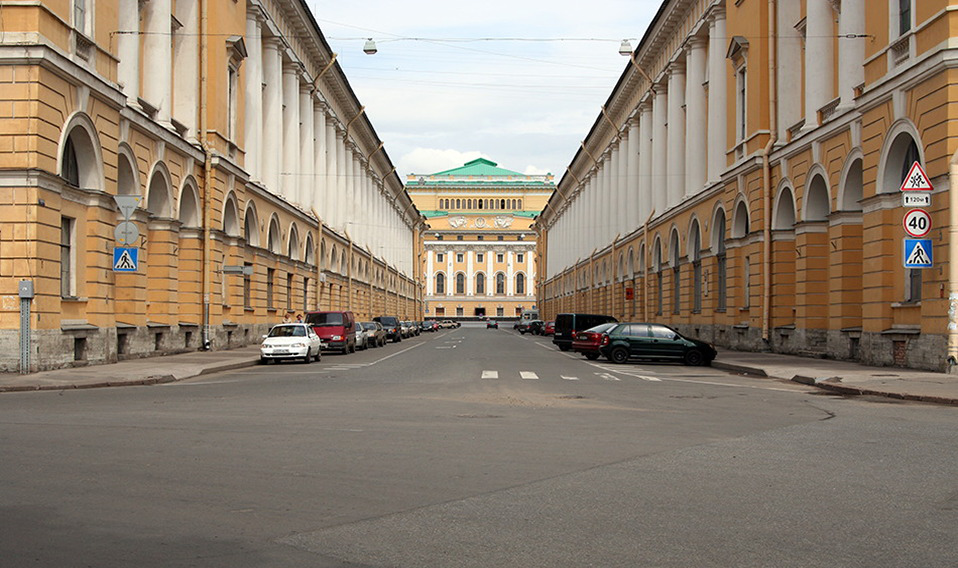

In [3]:
image1.show()

# Random Rotate

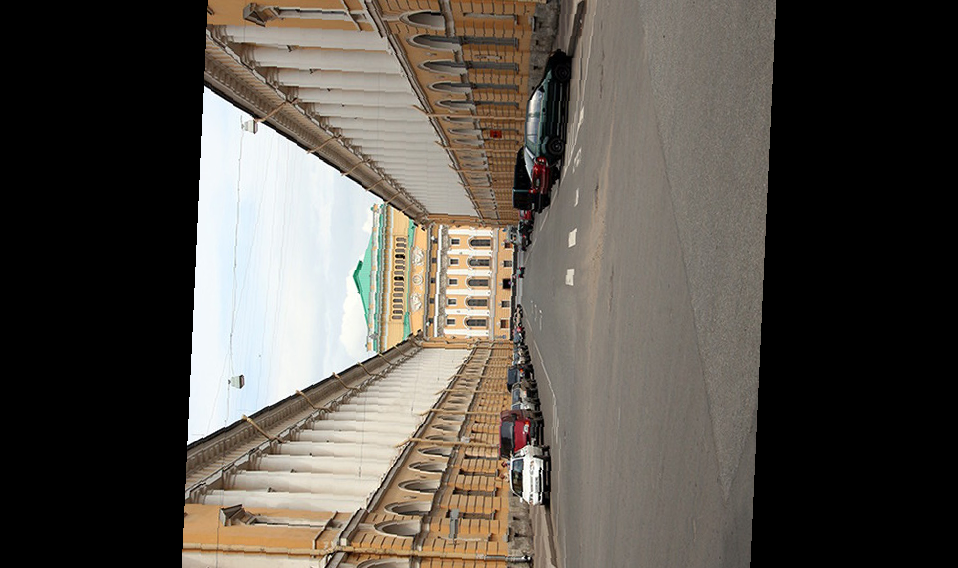

In [4]:
degrees = 360  # Range of rotation in degrees
transform = transforms.Compose([transforms.RandomRotation(degrees),])

rotated_image = transform(image1)
# rotated_image = transform(image2)
# rotated_image = transform(image3)
# rotated_image = transform(image4)
# rotated_image = transform(image5)
# rotated_image = transform(image6)
# rotated_image = transform(image7)

rotated_image

# Random Crop

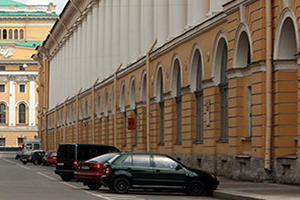

In [12]:
import random

crop_height = 200
crop_width = 300

transform = transforms.RandomCrop(size=(crop_height, crop_width))

cropped_image = transform(image1)
# cropped_image = transform(image2)
# cropped_image = transform(image3)
# cropped_image = transform(image4)
# cropped_image = transform(image5)
# cropped_image = transform(image6)
# cropped_image = transform(image7)

cropped_image

# Normalize

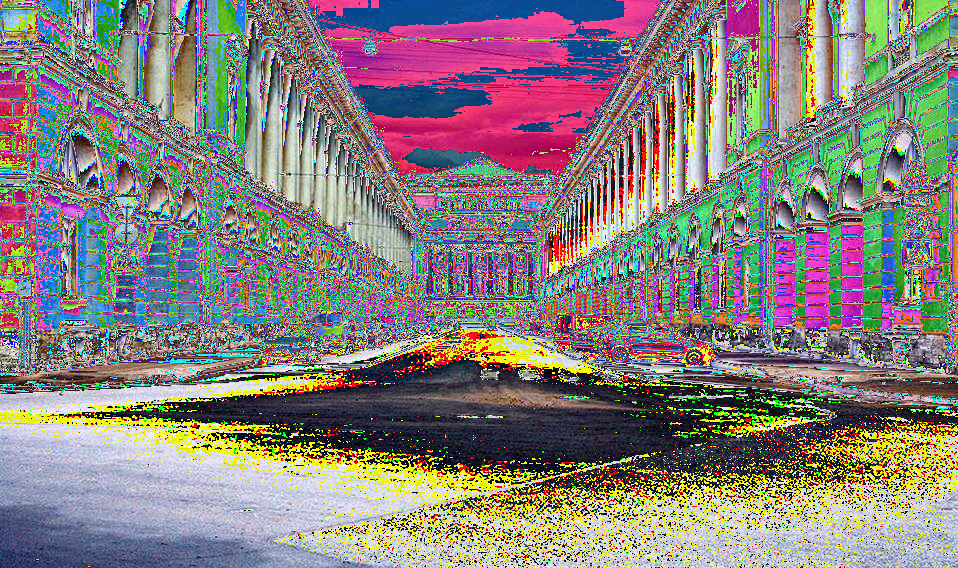

In [6]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

def normalization(img):
    # convert image to torch tensor
    imgTensor = transforms.ToTensor()(img)

    # define a transform to normalize the tensor
    transform = transforms.Normalize(mean, std)

    # normalize the converted tensor using above defined transform
    normalized_imgTensor = transform(imgTensor)

    # convert the normalized tensor to PIL image
    normalized_img = transforms.ToPILImage()(normalized_imgTensor)

    # display the normalized PIL image
    normalized_img.show()

normalization(image1)
# normalization(image2)
# normalization(image3)
# normalization(image4)
# normalization(image5)
# normalization(image6)
# normalization(image7)

# Random Horizontal and Vertical Flip

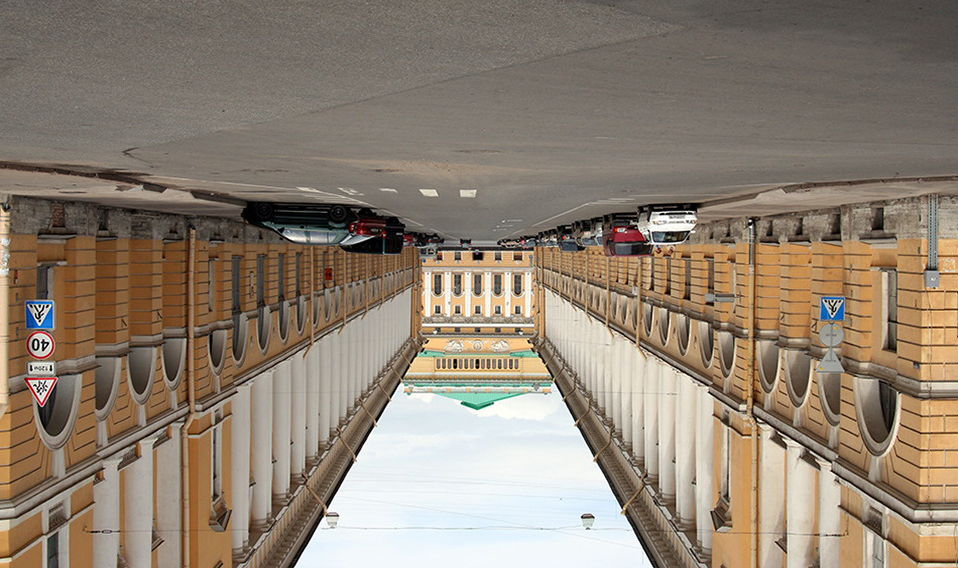

In [7]:
def Rand_H_V_Flip(img):
  # define the transforms
  transform_H = transforms.RandomHorizontalFlip(p=0.5)
  transform_V = transforms.RandomVerticalFlip(p=0.5)
  # apply above defined transform to the input image
  img_fliped = transform_H(img)
  img_fliped_2 = transform_V(img_fliped)
  img_fliped_2.show()

Rand_H_V_Flip(image1)
# Rand_H_V_Flip(image2)
# Rand_H_V_Flip(image3)
# Rand_H_V_Flip(image4)
# Rand_H_V_Flip(image5)
# Rand_H_V_Flip(image6)
# Rand_H_V_Flip(image7)

# Random Invert

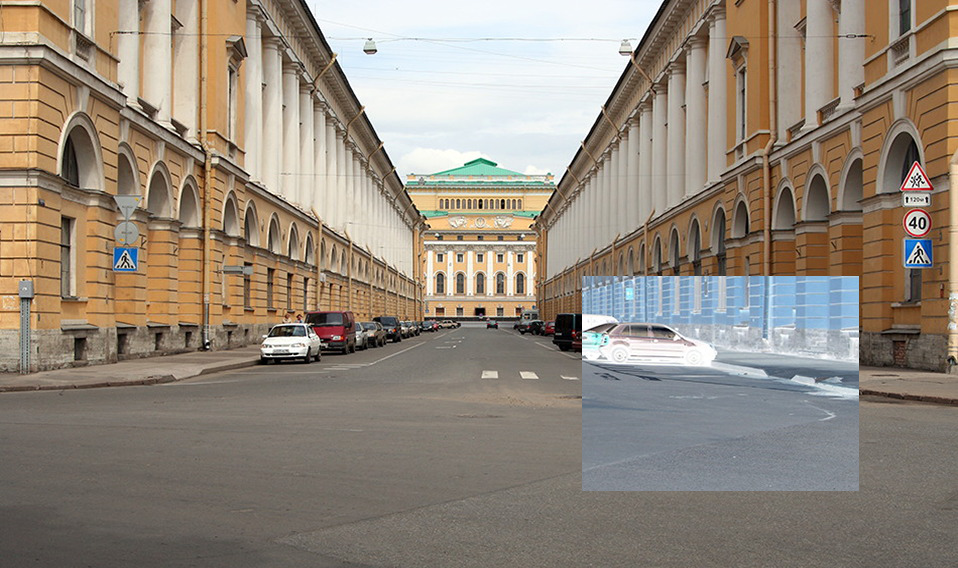

In [8]:
# define the transform
Random_Invert = transforms.RandomInvert(p=0.5)

# Invert a part of the image
def crop_transform_merge(img):
  img_copy = img.copy()
  # Crop the image
  left = np.random.randint(img.size[0])
  top = np.random.randint(img.size[1])
  right = np.random.randint(left, img.size[0])
  bottom = np.random.randint(top, img.size[1])
  cropped_image = img_copy.crop((left, top, right, bottom))

  # Transform the image (e.g. Random_Invert)
  Inverted_image = Random_Invert(cropped_image)

  # Merge the transformed image back into the original image
  img_copy.paste(Inverted_image, (left, top))
  return img_copy

output_img = crop_transform_merge(image1)
# output_img = crop_transform_merge(image2)
# output_img = crop_transform_merge(image3)
# output_img = crop_transform_merge(image4)
# output_img = crop_transform_merge(image5)
# output_img = crop_transform_merge(image6)
# output_img = crop_transform_merge(image7)

output_img.show()

# Erasing

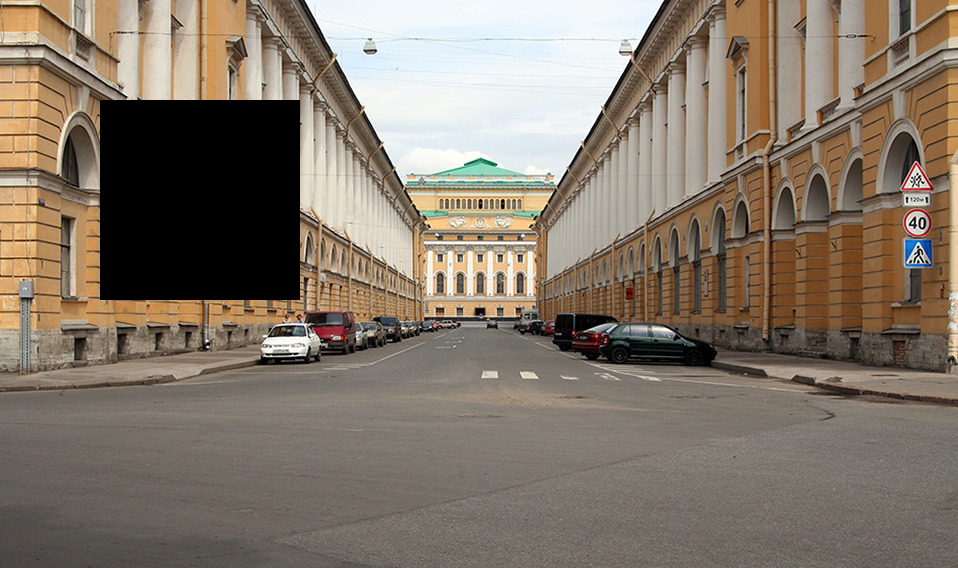

In [13]:
def erasing(img):
  img_copy = img.copy()
  # choose a part in the image
  left = 100
  top = 100
  right = 300
  bottom = 300

  # Replace a specific region with black pixels
  img_arr = np.array(img_copy)
  img_arr[left : right, top : bottom] = (0, 0, 0)
  img_copy = Image.fromarray(img_arr)
  return img_copy

out = erasing(image1)
# out = erasing(image2)
# out = erasing(image3)
# out = erasing(image4)
# out = erasing(image5)
# out = erasing(image6)
# out = erasing(image7)

out.show()

# ColorJitter

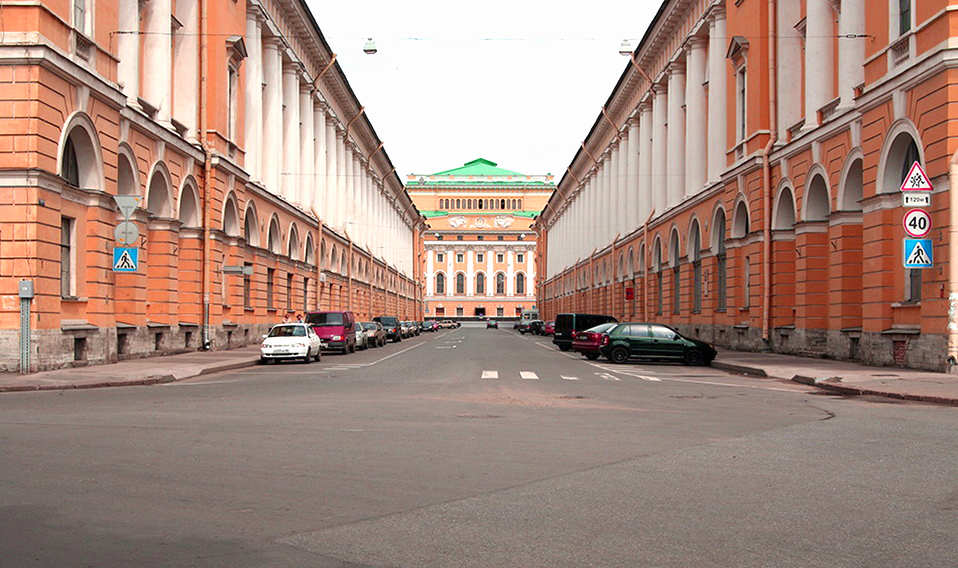

In [14]:
transform = albu.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=1)

def color_jitter(img):
  image = np.array(img)
  transformed_img = transform(image=image)['image']
  output = Image.fromarray(transformed_img)
  return output

o_img = color_jitter(image1)
# o_img = color_jitter(image2)
# o_img = color_jitter(image3)
# o_img = color_jitter(image4)
# o_img = color_jitter(image5)
# o_img = color_jitter(image6)
# o_img = color_jitter(image7)

o_img

# FiveCrop

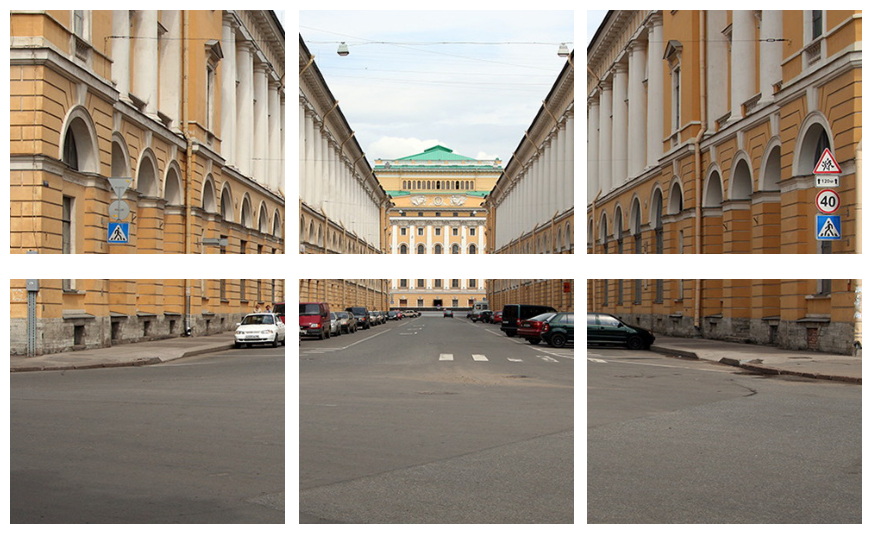

In [15]:
def FiveCrop(img):
  img_copy = img.copy()
  # Initialize an empty tuple
  images_tuple = ()

  width, height = img.size
  W_steps = int(width/3)
  H_steps = int(height/2)

  # Iterate 6 times
  for i in range(3):
    for j in range(2):
      image = img_copy.crop(( i*W_steps, j*H_steps, (i+1)*W_steps, (j+1)*H_steps))
      # Append the image to the tuple using tuple concatenation
      images_tuple = images_tuple + (image,)
  
  return images_tuple

out_img_2 = FiveCrop(image1)
# out_img_2 = FiveCrop(image2)
# out_img_2 = FiveCrop(image3)
# out_img_2 = FiveCrop(image4)
# out_img_2 = FiveCrop(image5)
# out_img_2 = FiveCrop(image6)
# out_img_2 = FiveCrop(image7)

# Create a 2x3 grid of subplots
f, axarr = plt.subplots(2, 3, figsize=(11, 7))
f.subplots_adjust(wspace=0.05, hspace=0)

# Display each image in the corresponding subplot
axarr[0, 0].imshow(out_img_2[0])
axarr[0, 1].imshow(out_img_2[2])
axarr[0, 2].imshow(out_img_2[4])
axarr[1, 0].imshow(out_img_2[1])
axarr[1, 1].imshow(out_img_2[3])
axarr[1, 2].imshow(out_img_2[5])

# Show the plot
[axi.set_axis_off() for axi in axarr.ravel()]
plt.show()
